# Probability and Statistics


## 1. Descriptive Statistics
 Use a dataset : Iris Dataset. 
 -> Perform the following tasks:    
 * Compute the mean, median, and standard deviation for all numerical features.  
 * Create histograms and boxplots for feature distributions.
 * Calculate the correlation matrix for the features.
 * Interpret which features are most correlated with each other.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('iris.csv')

print(data.head(5))


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


 ### Mean, Median, and Standard Deviation :  


In [13]:

numeric_data = data.select_dtypes(include='number')

mean_values = numeric_data.mean()
median_values = numeric_data.median()
std_deviation = numeric_data.std()

print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation Values:\n", std_deviation)


Mean Values:
 sepal.length    5.843333
sepal.width     3.057333
petal.length    3.758000
petal.width     1.199333
dtype: float64

Median Values:
 sepal.length    5.80
sepal.width     3.00
petal.length    4.35
petal.width     1.30
dtype: float64

Standard Deviation Values:
 sepal.length    0.828066
sepal.width     0.435866
petal.length    1.765298
petal.width     0.762238
dtype: float64


### Histogram:

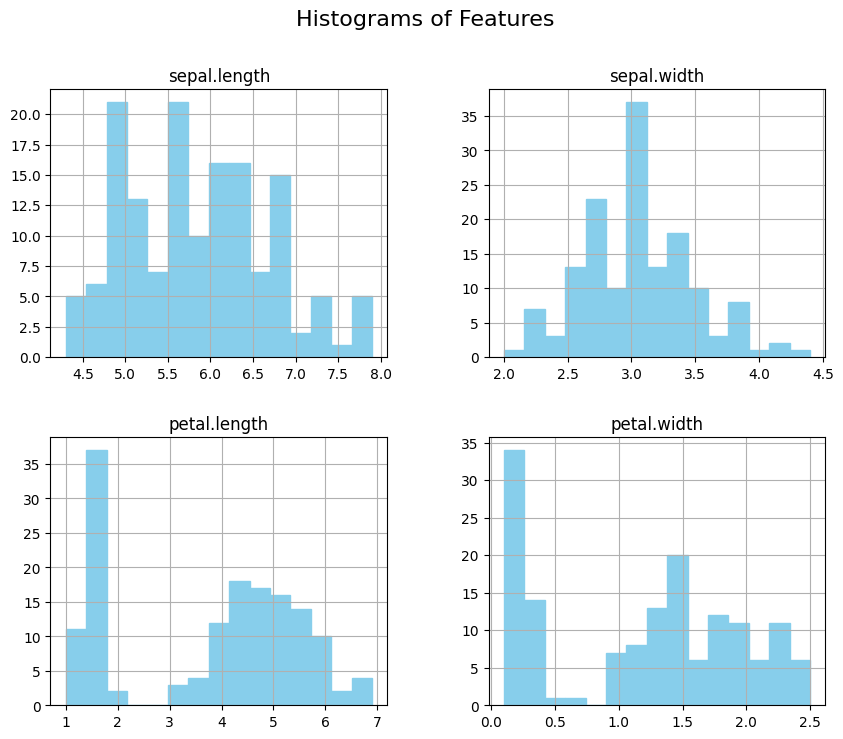

In [ ]:

data = pd.read_csv('iris.csv')

numeric_data = data.select_dtypes(include='number')

numeric_data.hist(figsize=(10, 8), bins=15, color='skyblue', edgecolor='skyblue')
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()



### Boxplot:

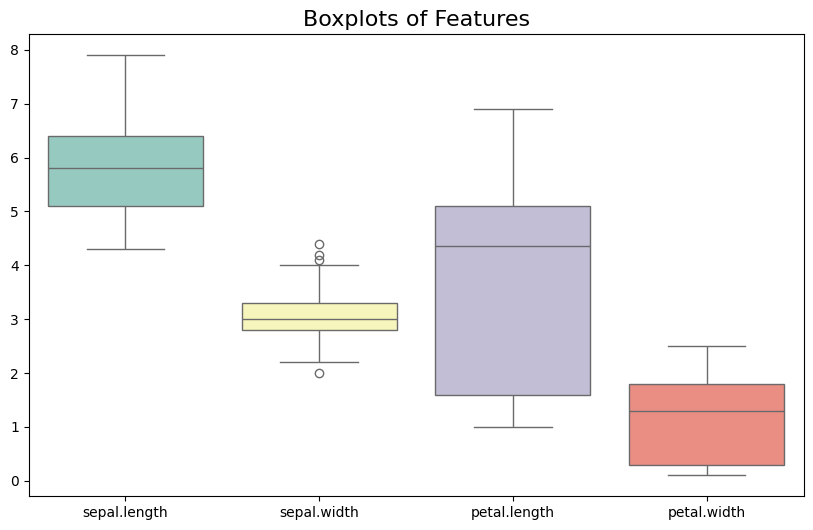

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_data, palette="Set3")
plt.title("Boxplots of Features", fontsize=16)
plt.show()

 ### Correlation matrix:


Correlation Matrix:
               sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000


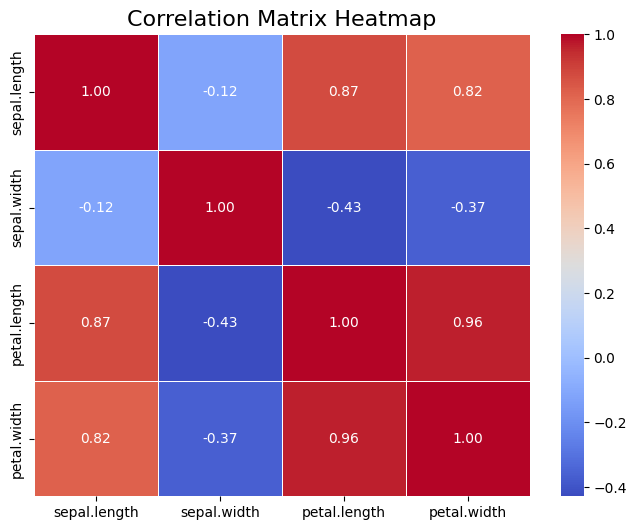

In [17]:

correlation_matrix = numeric_data.corr()

print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


### Correlated Features:

In [18]:
correlation_matrix = numeric_data.corr()

correlations = correlation_matrix.unstack()
correlations = correlations[correlations != 1.0]  
sorted_correlations = correlations.sort_values(ascending=False)

print("\nMost Positively Correlated Features:\n", sorted_correlations.head(5))

# print("\nMost Negatively Correlated Features:\n", sorted_correlations.tail(5))



Most Positively Correlated Features:
 petal.length  petal.width     0.962865
petal.width   petal.length    0.962865
sepal.length  petal.length    0.871754
petal.length  sepal.length    0.871754
sepal.length  petal.width     0.817941
dtype: float64

Most Negatively Correlated Features:
 sepal.length  sepal.width    -0.117570
sepal.width   petal.width    -0.366126
petal.width   sepal.width    -0.366126
petal.length  sepal.width    -0.428440
sepal.width   petal.length   -0.428440
dtype: float64


## 2. Conditional Probability
### Given the following table of events compute P(A∣B) and P(B∣A)
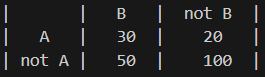


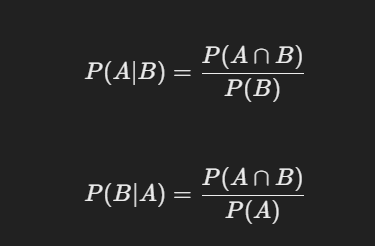

In [20]:
total = 200
A_and_B = 30  # P(A ∩ B)
A = 30 + 20   # P(A)
B = 30 + 50   # P(B)

P_A = A / total
P_B = B / total
P_A_and_B = A_and_B / total

P_A_given_B = P_A_and_B / P_B
P_B_given_A = P_A_and_B / P_A

print(f"P(A|B) = {P_A_given_B:.3f}")
print(f"P(B|A) = {P_B_given_A:.3f}")


P(A|B) = 0.375
P(B|A) = 0.600


### 3. Bayes' Theorem
#### A model classifies spam emails with the following probabilities:
P(Spam)=0.2
P(Not Spam)=0.8
P(Keyword | Spam)=0.7
P(Keyword | Not Spam)=0.1
Compute the probability that an email is spam given that it contains the keyword.

In [1]:
P_Spam = 0.2
P_Not_Spam = 0.8
P_Keyword_given_Spam = 0.7
P_Keyword_given_Not_Spam = 0.1

P_Keyword = (P_Keyword_given_Spam * P_Spam) + (P_Keyword_given_Not_Spam * P_Not_Spam)

P_Spam_given_Keyword = (P_Keyword_given_Spam * P_Spam) / P_Keyword

print(f"P(Spam | Keyword) = {P_Spam_given_Keyword:.3f}")

P(Spam | Keyword) = 0.636


## 4. Outlier Detection, Removal, and Feature Scaling
###  Choose a dataset on your own and perform the following operation
* Compute Q1 (25th percentile) and Q3 (75th percentile) for each feature.
* Calculate the IQR (IQR=Q3−Q1).
* Define outliers as values outside the range [Q1−1.5⋅IQR,Q3+1.5⋅IQR].
* Create a function to detect and remove outliers for all numerical features.
* Plot boxplots of features before and after outlier removal.  
* Plot histograms of a few features before and after applying normalization and standardization.

#### Compute Q1 (25th percentile) and Q3 (75th percentile) for each feature.
#### Calculate the IQR (IQR=Q3−Q1).

In [3]:
import pandas as pd

data = pd.read_csv("iris.csv")

num_features = data.select_dtypes(include=["number"]).columns

Q1 = data[num_features].quantile(0.25)
Q3 = data[num_features].quantile(0.75)
IQR = Q3 - Q1

print("Q1:\n", Q1)
print("Q3:\n", Q3)
print("IQR:\n", IQR)


Q1:
 sepal.length    5.1
sepal.width     2.8
petal.length    1.6
petal.width     0.3
Name: 0.25, dtype: float64
Q3:
 sepal.length    6.4
sepal.width     3.3
petal.length    5.1
petal.width     1.8
Name: 0.75, dtype: float64
IQR:
 sepal.length    1.3
sepal.width     0.5
petal.length    3.5
petal.width     1.5
dtype: float64


#### Define outliers as values outside the range [Q1−1.5⋅IQR,Q3+1.5⋅IQR].

In [9]:
import pandas as pd

iris = pd.read_csv("iris.csv")

num_features = iris.select_dtypes(include=["number"]).columns

Q1 = iris[num_features].quantile(0.25)
Q3 = iris[num_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (iris[num_features] < lower_bound) | (iris[num_features] > upper_bound)

print("Outlier counts per feature:\n", outliers.sum())


Outlier counts per feature:
 sepal.length    0
sepal.width     4
petal.length    0
petal.width     0
dtype: int64


#### Create a function to detect and remove outliers for all numerical features.

In [12]:
def detect_and_remove_outliers(df):
    num_features = df.select_dtypes(include=["number"]).columns  
    Q1 = df[num_features].quantile(0.25)  
    Q3 = df[num_features].quantile(0.75)  
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #df_clean = [x for x in df[num_features] if lower_bound <= x <= upper_bound]
    
    df_clean = df[~((df[num_features] < lower_bound) | (df[num_features] > upper_bound)).any(axis=1)]

    return df_clean

iris = pd.read_csv("iris.csv")

iris_clean = detect_and_remove_outliers(iris)

print("Original data shape:", iris.shape)
print("Data shape after removing outliers:", iris_clean.shape)


Original data shape: (150, 5)
Data shape after removing outliers: (146, 5)


####  Plot boxplots of features before and after outlier removal. 

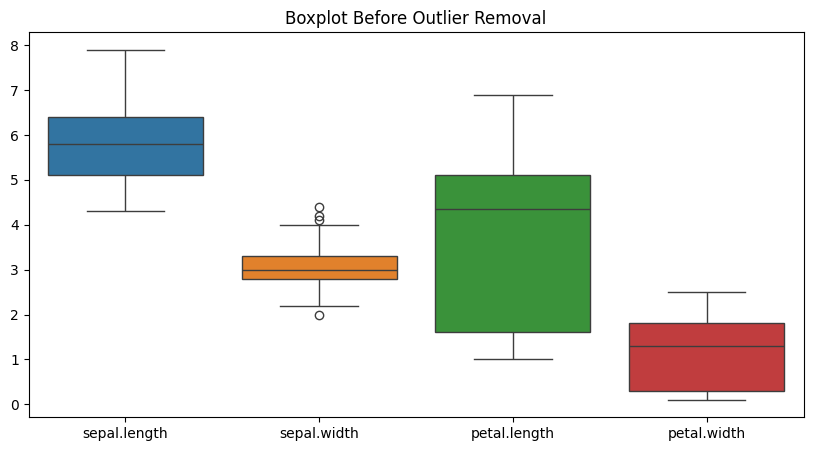

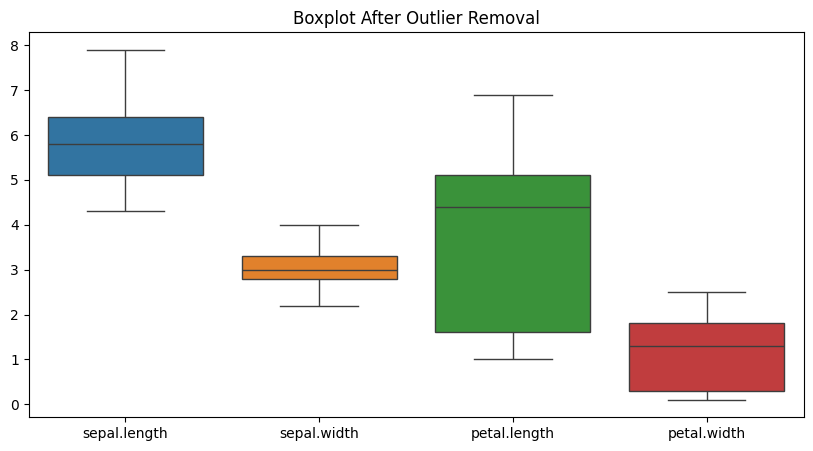

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=iris[num_features])
plt.title("Boxplot Before Outlier Removal")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=iris_clean[num_features])
plt.title("Boxplot After Outlier Removal")
plt.show()

#### Plot histograms of a few features before and after applying normalization and standardization.

##### Example
* Normalization (Min-Max Scaling)
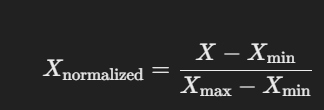

👉 Use Normalization when: Data is not normally distributed or when working with models like Neural Networks, KNN, or SVM.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # Creates a Min-Max scaler
iris_normalized = scaler.fit_transform(iris_clean[num_features])  # Applies normalization


* Standardization (Z-score Scaling)
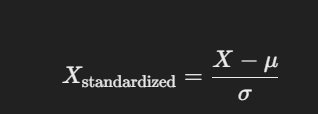

👉 Use Standardization when: Data is normally distributed or when using linear regression, logistic regression, SVM, or PCA.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
iris_standardized = scaler.fit_transform(iris_clean[num_features]) 


#### Histogram

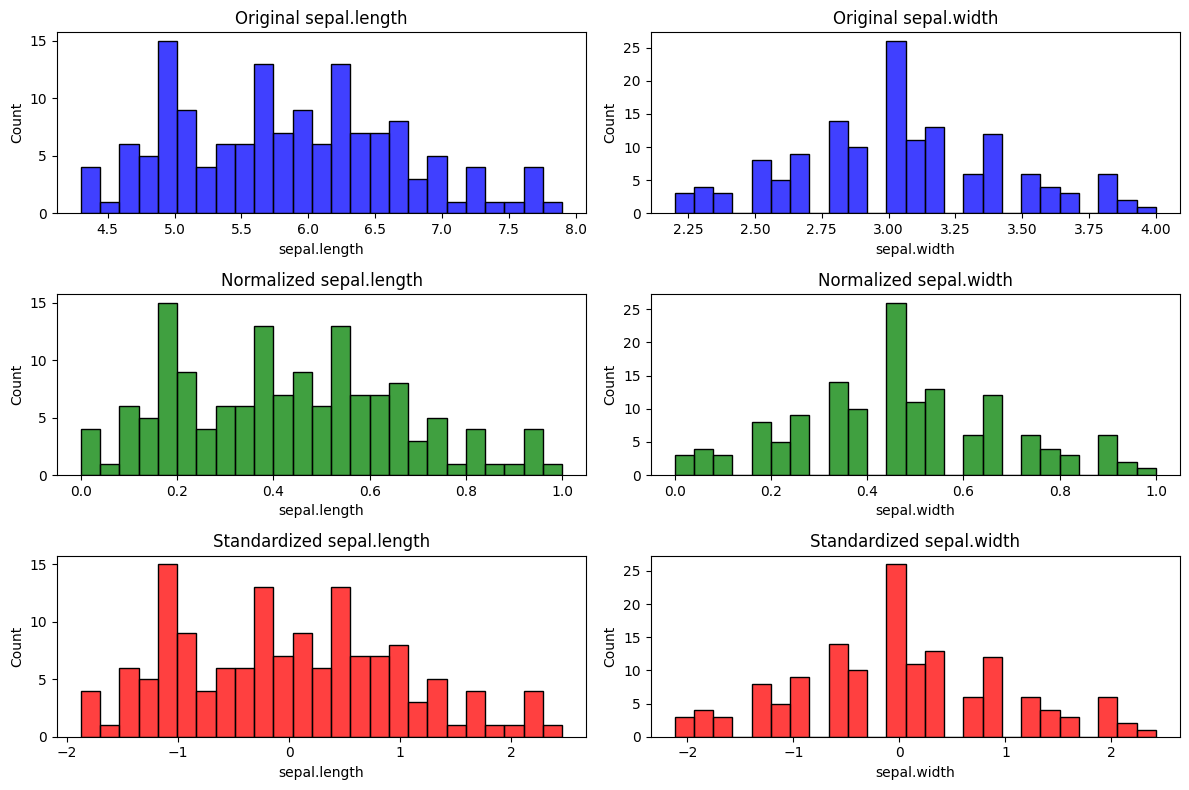

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

iris = pd.read_csv("iris.csv")

num_features = iris.select_dtypes(include=["number"]).columns

def detect_and_remove_outliers(df):
    Q1 = df[num_features].quantile(0.25)
    Q3 = df[num_features].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df[~((df[num_features] < lower_bound) | (df[num_features] > upper_bound)).any(axis=1)]
    
    return df_clean

iris_clean = detect_and_remove_outliers(iris)

scaler_minmax = MinMaxScaler()
iris_normalized = pd.DataFrame(scaler_minmax.fit_transform(iris_clean[num_features]), columns=num_features)

scaler_standard = StandardScaler()
iris_standardized = pd.DataFrame(scaler_standard.fit_transform(iris_clean[num_features]), columns=num_features)

features_to_plot = num_features[:2]  

fig, axes = plt.subplots(3, 2, figsize=(12, 8))

for i, feature in enumerate(features_to_plot):
    
    sns.histplot(iris_clean[feature], bins=25, ax=axes[0, i],  color='blue')
    axes[0, i].set_title(f'Original {feature}')

    sns.histplot(iris_normalized[feature], bins=25, ax=axes[1, i],  color='green')
    axes[1, i].set_title(f'Normalized {feature}')

    sns.histplot(iris_standardized[feature], bins=25, ax=axes[2, i],  color='red')
    axes[2, i].set_title(f'Standardized {feature}')

plt.tight_layout()
plt.show()
